In [177]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
# plt.rcParams['figure.figsize'] = [12, 9]
import scipy.optimize as opt
import torch
import torch.nn as nn
from mpl_toolkits import mplot3d
from tqdm import tqdm

In [5]:
class RoundSTE(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        output = torch.round(input)
        return output

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output

def quant(x, alpha, bits):
    qmax = 2 ** bits - 1
    qmin = 0
    
    delta = 2 * alpha / qmax
    
    tq = (x + alpha) / delta
    tq = torch.clamp(tq, qmin, qmax)
    tq = RoundSTE.apply(tq)
    tq = tq * delta - alpha
    
    return tq

In [326]:
N = 10000
x1 = torch.tensor(np.random.normal(size=N), dtype=torch.float32).cuda().view(100, 100)
x2 = torch.tensor(np.random.normal(size=N), dtype=torch.float32).cuda().view(100, 100)
x1 /= x1.max()
x2 /= x2.max()

bits = 2
y = torch.matmul(x1, x2)
y_q = torch.matmul(quant(x1, 1, bits), quant(x2, 1, bits))
# print(y)
# print(y_q)
print(torch.nn.MSELoss()(y_q, y))

# clip = np.linspace(0.1, x1.max().item(), 100)
# plt.plot(clip, [(torch.dot(quant(x1, c, 2), x2) - y).abs().item()/N for c in clip])

tensor(0.7983, device='cuda:0')


100%|██████████| 30/30 [00:00<00:00, 68.21it/s]


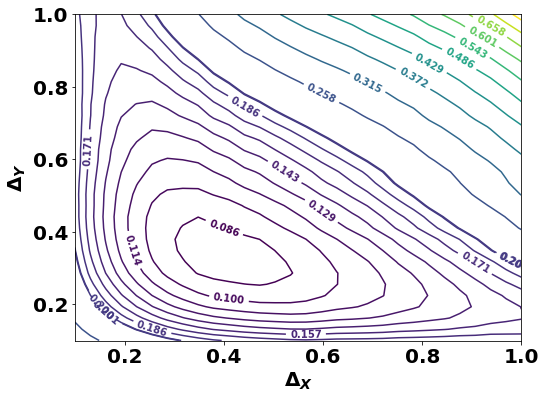

In [426]:
bits = 2

def f(Xc1, Xc2):
    Z = torch.empty_like(torch.from_numpy(Xc1))
    for i in tqdm(range(Xc1.shape[0])):
        row1 = Xc1[i, :]
        row2 = Xc2[i, :]
        Z[i, :] = torch.tensor([torch.nn.MSELoss()(torch.matmul(quant(x1, row1[i], bits), quant(x2, row2[i], bits)), y) for i in range(len(row1))])
    return Z

c1 = np.linspace(0.1, x1.max().item(), 30)
c2 = np.linspace(0.1, x2.max().item(), 30)
Xc1, Xc2 = np.meshgrid(c1, c2)
Z = f(Xc1, Xc2)

# fig = plt.figure()
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.spectral)
# # ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.terrain)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');
# ax.view_init(30, 120)

plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
levels = np.concatenate([np.linspace(0., 0.2, 15), np.linspace(0.201, 1, 15)])
# cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), 30)
cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), levels=levels)
ax.clabel(cs, inline=1, fontsize=10);
plt.xlabel(r'$\Delta_X$');
plt.ylabel(r'$\Delta_Y$');
plt.tight_layout()
plt.savefig('../fig/p_vs_lpnorm.pdf')

100%|██████████| 30/30 [00:00<00:00, 66.90it/s]


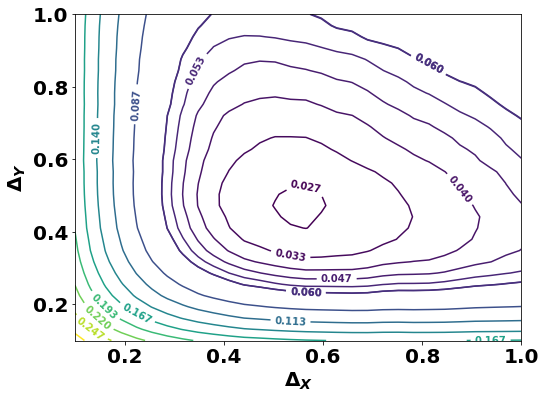

In [427]:
bits = 3

def f(Xc1, Xc2):
    Z = torch.empty_like(torch.from_numpy(Xc1))
    for i in tqdm(range(Xc1.shape[0])):
        row1 = Xc1[i, :]
        row2 = Xc2[i, :]
        Z[i, :] = torch.tensor([torch.nn.MSELoss()(torch.matmul(quant(x1, row1[i], bits), quant(x2, row2[i], bits)), y) for i in range(len(row1))])
    return Z

c1 = np.linspace(0.1, x1.max().item(), 30)
c2 = np.linspace(0.1, x2.max().item(), 30)
Xc1, Xc2 = np.meshgrid(c1, c2)
Z = f(Xc1, Xc2)

# fig = plt.figure()
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.spectral)
# # ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.terrain)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');
# ax.view_init(30, 120)

plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
levels = np.concatenate([np.linspace(0., 0.06, 10), np.linspace(0.0601, 0.3, 10)])
# cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), 30)
cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), levels=levels)
ax.clabel(cs, inline=1, fontsize=10);
plt.xlabel(r'$\Delta_X$');
plt.ylabel(r'$\Delta_Y$');

100%|██████████| 30/30 [00:00<00:00, 65.67it/s]


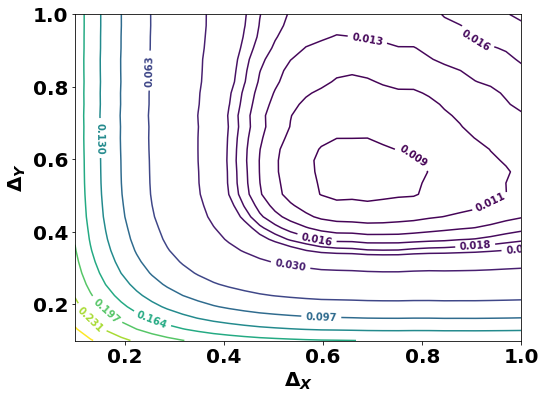

In [428]:
bits = 4

def f(Xc1, Xc2):
    Z = torch.empty_like(torch.from_numpy(Xc1))
    for i in tqdm(range(Xc1.shape[0])):
        row1 = Xc1[i, :]
        row2 = Xc2[i, :]
        Z[i, :] = torch.tensor([torch.nn.MSELoss()(torch.matmul(quant(x1, row1[i], bits), quant(x2, row2[i], bits)), y) for i in range(len(row1))])
    return Z

c1 = np.linspace(0.1, x1.max().item(), 30)
c2 = np.linspace(0.1, x2.max().item(), 30)
Xc1, Xc2 = np.meshgrid(c1, c2)
Z = f(Xc1, Xc2)

# fig = plt.figure()
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.spectral)
# # ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.terrain)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');
# ax.view_init(30, 120)

plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
levels = np.concatenate([np.linspace(0., 0.02, 10), np.linspace(0.03, 1, 30)])
# cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), 30)
cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), levels=levels)
ax.clabel(cs, inline=1, fontsize=10);
plt.xlabel(r'$\Delta_X$');
plt.ylabel(r'$\Delta_Y$');

100%|██████████| 30/30 [00:00<00:00, 65.98it/s]


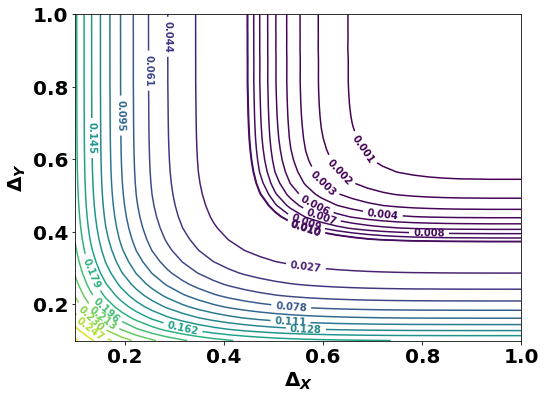

In [429]:
bits = 8

def f(Xc1, Xc2):
    Z = torch.empty_like(torch.from_numpy(Xc1))
    for i in tqdm(range(Xc1.shape[0])):
        row1 = Xc1[i, :]
        row2 = Xc2[i, :]
        Z[i, :] = torch.tensor([torch.nn.MSELoss()(torch.matmul(quant(x1, row1[i], bits), quant(x2, row2[i], bits)), y) for i in range(len(row1))])
    return Z

c1 = np.linspace(0.1, x1.max().item(), 30)
c2 = np.linspace(0.1, x2.max().item(), 30)
Xc1, Xc2 = np.meshgrid(c1, c2)
Z = f(Xc1, Xc2)

# fig = plt.figure()
# fig = plt.figure(figsize=(10, 10))
# ax = plt.axes(projection='3d')
# ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.spectral)
# # ax.plot_surface(Xc1, Xc2, Z.cpu().numpy(), cmap=cm.terrain)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z');
# ax.view_init(30, 120)

plt.rcParams['figure.figsize'] = [8, 6]
font = {'weight' : 'normal', 'size': 20, 'weight': 'bold'}
matplotlib.rc('font', **font)

fig, ax = plt.subplots()
levels = np.concatenate([np.linspace(0., 0.01, 10), np.linspace(0.0101, 0.5, 30)])
# cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), 30)
cs = ax.contour(Xc1, Xc2, Z.cpu().numpy(), levels=levels)
ax.clabel(cs, inline=1, fontsize=10);
plt.xlabel(r'$\Delta_X$');
plt.ylabel(r'$\Delta_Y$');